<a href="https://colab.research.google.com/github/adrianestebanrodriguez/Repositorio_Datasets/blob/main/jugodenaranja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ejercicio: Revisión de cumplimiento de grados Brix en zumo de naranja**

**Problema a resolver**: Una planta de zumo de naranja tiene problemas con la estandarización de su producto en el grado de dulzor. Quiere saber en qué debe mejorar su proceso a partir de un ejercicio de visualización y analítica de datos.
Actualmente hacen mediciones de grados brix de sus lotes de producción

Descripción general del Dataset

* **ID_Lote:** Entero nominal, rango de 1 a 1000. Identificador único y secuencial
de cada lote de producción. Se puede usar como índice de observación.

* **Fecha_Hora:** Datetime (Temporal) 2025-10-14 08:00:00  Registra el momento exacto de la medición.

* **Brix_Medido:**: Flotante (Continuo) El valor de ∘ Bx real medido en el lote. Los límites de calidad suelen ser 11.8 a 13.2.

* **Turno:** Categórico (Nominal Mañana / Tarde / Noche Turno de producción. Útil para análisis de variación (¿un turno produce jugos más dulces?).

* **Temperatura_Proceso:**: Flotante (Continuo 85.5 a 90.5 Variable de entrada o proceso. Puede ser una variable explicativa (feature) en un modelo de pronóstico.

* **Tipo_Naranja:** Booleano / Categórico Estacionaria / No Estacionaria Resultado del ejercicio. Se llenaría después de aplicar la Prueba ADF a la serie histórica.

In [ ]:
import pandas as pd
import numpy as np


# Semilla para reproducibilidad
np.random.seed(42)

# 1. Crear la columna de Fecha y Hora (1000 lotes, aproximadamente 2.5 horas por lote)
fechas_horas = pd.to_datetime('2025-10-14 08:00:00') + pd.to_timedelta(np.arange(1000) * 2.5, unit='h')

# 2. Simular la serie de Grados Brix (Brix_Medido) con una ligera no estacionariedad
# Generamos un proceso de caminata aleatoria (no estacionario) para simular la dependencia
# Brix inicial alrededor de 12.0
initial_brix = 12.0
# Ruido blanco
ruido = np.random.normal(loc=0, scale=0.15, size=1000)
# Creamos la caminata aleatoria acumulando el ruido: Y_t = Y_{t-1} + ruido_t
# Esto simula un proceso con raíz unitaria
brix_caminata = initial_brix + np.cumsum(ruido)
# Agregamos una media base y limitamos el rango para que sea realista
Brix_Medido = 12.0 + (brix_caminata - 12.0) * 0.1 + np.random.normal(loc=0, scale=0.1, size=1000)
Brix_Medido = np.clip(Brix_Medido, 11.5, 13.5) # Asegurar que los valores sean realistas

# 3. Crear las columnas categóricas y continuas restantes
ID_Lote = np.arange(1, 1001)
Turno = np.tile(['Mañana', 'Tarde', 'Noche', 'Noche'], 250)[:1000] # Repite para 1000 lotes
Temperatura_Proceso = np.random.normal(loc=88.5, scale=1.0, size=1000)
Tipo_Naranja = np.random.choice(['Valencia', 'Navel', 'Mixta'], size=1000, p=[0.5, 0.3, 0.2])

# 4. Crear el DataFrame
data = pd.DataFrame({
    'ID_Lote': ID_Lote,
    'Fecha_Hora': fechas_horas,
    'Brix_Medido': Brix_Medido.round(2), # Redondeado a dos decimales
    'Turno': Turno,
    'Temperatura_Proceso': Temperatura_Proceso.round(1),
    'Tipo_Naranja': Tipo_Naranja,
})

# Mostrar las primeras 10 filas
print(data.head(10).to_markdown(index=False))

|   ID_Lote | Fecha_Hora          |   Brix_Medido | Turno   |   Temperatura_Proceso | Tipo_Naranja   |
|----------:|:--------------------|--------------:|:--------|----------------------:|:---------------|
|         1 | 2025-10-14 08:00:00 |         12.15 | Mañana  |                  87.8 | Mixta          |
|         2 | 2025-10-14 10:30:00 |         12.1  | Tarde   |                  88.4 | Mixta          |
|         3 | 2025-10-14 13:00:00 |         12.02 | Noche   |                  87.7 | Valencia       |
|         4 | 2025-10-14 15:30:00 |         11.97 | Noche   |                  88.2 | Mixta          |
|         5 | 2025-10-14 18:00:00 |         12.1  | Mañana  |                  86.6 | Valencia       |
|         6 | 2025-10-14 20:30:00 |         12.07 | Tarde   |                  88.7 | Valencia       |
|         7 | 2025-10-14 23:00:00 |         12.14 | Noche   |                  88.5 | Valencia       |
|         8 | 2025-10-15 01:30:00 |         12.13 | Noche   |            

#Test ADF

Estadístico ADF: -1.649466459124714
Valor p: 0.4573186970253822
Valores Críticos:
   1%: -3.4369927443074353
   5%: -2.864472756705845
   10%: -2.568331546097238

Nivel de Significación (α): 0.05
Conclusión: No podemos rechazar la hipótesis nula (H0). La serie no es estacionaria.

Interpretación adicional comparando el Estadístico ADF con los Valores Críticos:
El Estadístico ADF es mayor que el valor crítico al 5%, lo que sugiere que la serie no es estacionaria (o se necesita más evidencia para rechazar H0).

Estadísticas Descriptivas:


,ID_Lote,Fecha_Hora,Brix_Medido,Temperatura_Proceso
count,1000.000000,1000,1000.000000,1000.000000
mean,500.500000,2025-12-05 08:45:00,12.001770,88.507000
min,1.000000,2025-10-14 08:00:00,11.510000,85.500000
25%,250.750000,2025-11-09 08:22:30,11.880000,87.900000
50%,500.500000,2025-12-05 08:45:00,11.970000,88.500000
75%,750.250000,2025-12-31 09:07:30,12.110000,89.200000
max,1000.000000,2026-01-26 09:30:00,12.630000,92.400000
std,288.819436,NaN,0.177059,0.982536


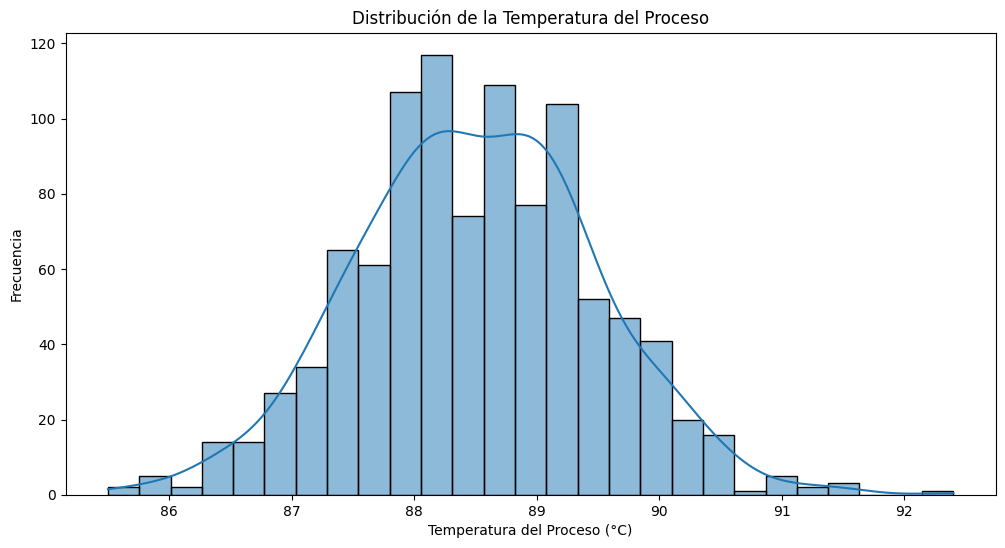

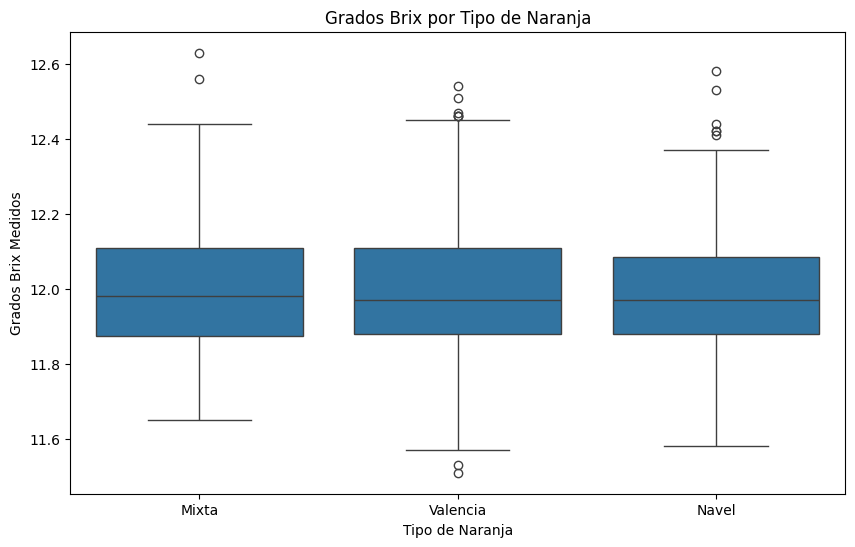

In [ ]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns

# Realizar la Prueba ADF
resultado_adf = adfuller(data['Brix_Medido'])

# Extraer los resultados
estadistico_adf = resultado_adf[0]
p_valor = resultado_adf[1]
valores_criticos = resultado_adf[4]

print(f'Estadístico ADF: {estadistico_adf}')
print(f'Valor p: {p_valor}')
print('Valores Críticos:')
for key, value in valores_criticos.items():
    print(f'   {key}: {value}')

# Interpretar los resultados
alpha = 0.05
print(f'\nNivel de Significación (α): {alpha}')

if p_valor <= alpha:
    print("Conclusión: Rechazamos la hipótesis nula (H0). La serie es estacionaria.")
else:
    print("Conclusión: No podemos rechazar la hipótesis nula (H0). La serie no es estacionaria.")

# También se puede comparar el estadístico ADF con los valores críticos
print("\nInterpretación adicional comparando el Estadístico ADF con los Valores Críticos:")
if estadistico_adf < valores_criticos['5%']:
    print("El Estadístico ADF es menor que el valor crítico al 5%, lo que sugiere que la serie es estacionaria.")
else:
    print("El Estadístico ADF es mayor que el valor crítico al 5%, lo que sugiere que la serie no es estacionaria (o se necesita más evidencia para rechazar H0).")

# Sacar estadísticas descriptivas
print("\nEstadísticas Descriptivas:")
display(data.describe())

# Gráfico de mediciones de temperatura
plt.figure(figsize=(12, 6))
sns.histplot(data['Temperatura_Proceso'], kde=True)
plt.title('Distribución de la Temperatura del Proceso')
plt.xlabel('Temperatura del Proceso (°C)')
plt.ylabel('Frecuencia')
plt.show()


# Gráfico de grados brix por tipo de naranja
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tipo_Naranja', y='Brix_Medido', data=data)
plt.title('Grados Brix por Tipo de Naranja')
plt.xlabel('Tipo de Naranja')
plt.ylabel('Grados Brix Medidos')
plt.show()

In [ ]:
#Realizar análisis de brix por turno

Análisis de Grados Brix por Turno:


,count,mean,std,min,25%,50%,75%,max
Turno,,,,,,,,
Mañana,250.0,12.00104,0.172151,11.57,11.89,11.97,12.10,12.56
Noche,500.0,12.00008,0.177443,11.51,11.88,11.97,12.11,12.58
Tarde,250.0,12.00588,0.181713,11.53,11.88,11.98,12.10,12.63



Análisis de Grados Brix por Tipo de Naranja:


,count,mean,std,min,25%,50%,75%,max
Tipo_Naranja,,,,,,,,
Mixta,195.0,12.007026,0.177370,11.65,11.875,11.98,12.110,12.63
Navel,295.0,11.994339,0.163402,11.58,11.880,11.97,12.085,12.58
Valencia,510.0,12.004059,0.184578,11.51,11.880,11.97,12.110,12.54


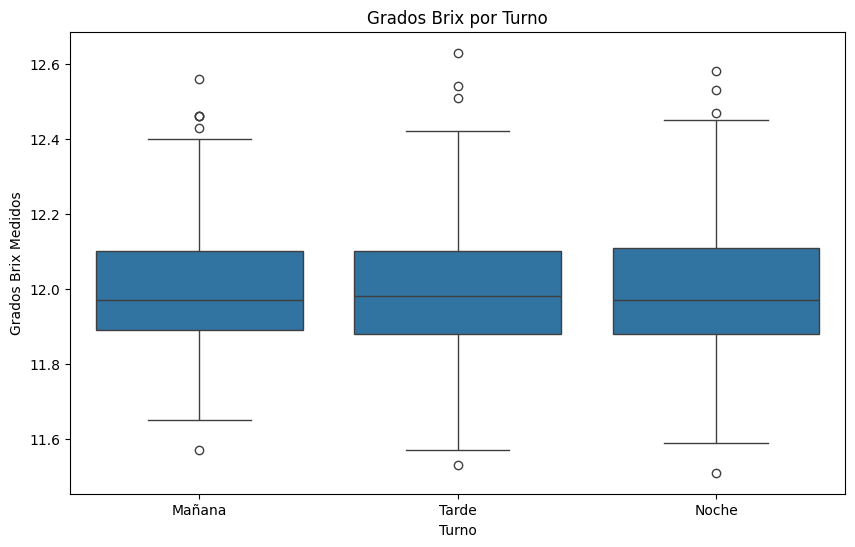

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de grados brix por turno
plt.figure(figsize=(10, 6))
sns.boxplot(x='Turno', y='Brix_Medido', data=data)
plt.title('Grados Brix por Turno')
plt.xlabel('Turno')
plt.ylabel('Grados Brix Medidos')
plt.show()

Al observar el diagrama de caja y las estadísticas descriptivas, no parecen existir diferencias significativas en el promedio (media) ni en la dispersión (desviación estándar, cuartiles) de los niveles de grados Brix entre los cambios de turno "Mañana", "Tarde" y "Noche".

Si bien puede haber ligeras variaciones en la mediana o en la magnitud de los valores atípicos, las distribuciones generales de los valores de Brix son bastante similares en todos los cambios. Esto sugiere que el cambio en sí mismo podría no ser un factor principal que influya en la variación de los niveles de Brix.

#Posibles Cambios Por Tipo de Naranja:

A partir del diagrama de caja y las estadísticas descriptivas de "Tipo_Naranja", se observa que:

Los tres tipos de naranjas ('Valencia', 'Navel' y 'Mixta') tienen niveles promedio de grados Brix muy similares.

La dispersión de los valores de Brix (indicada por el tamaño de la caja y los bigotes en el diagrama de caja y la desviación estándar en las estadísticas) también es bastante similar en los tres tipos.

Esto indica que, según este conjunto de datos, el tipo de naranja utilizado no parece ser un factor importante que contribuya a la variación en los valores finales de Brix del jugo.

#Conclusión general:

Según este análisis, ni el cambio de turno de producción ni el tipo de naranja utilizado parecen ser factores determinantes de la variación observada en los valores de Brix. La no estacionariedad identificada anteriormente sugiere que existen otros factores que influyen en los niveles de Brix a lo largo del tiempo.

Deberíamos investigar otras variables o posibles factores no medidos que podrían estar causando cambios en los valores de Brix. La Temperatura_Proceso es otra variable del conjunto de datos que podría explorarse. Además, analizar los valores de Brix como un gráfico de series temporales podría revelar tendencias o patrones no evidentes en estas comparaciones categóricas.

Analisis de series temporales

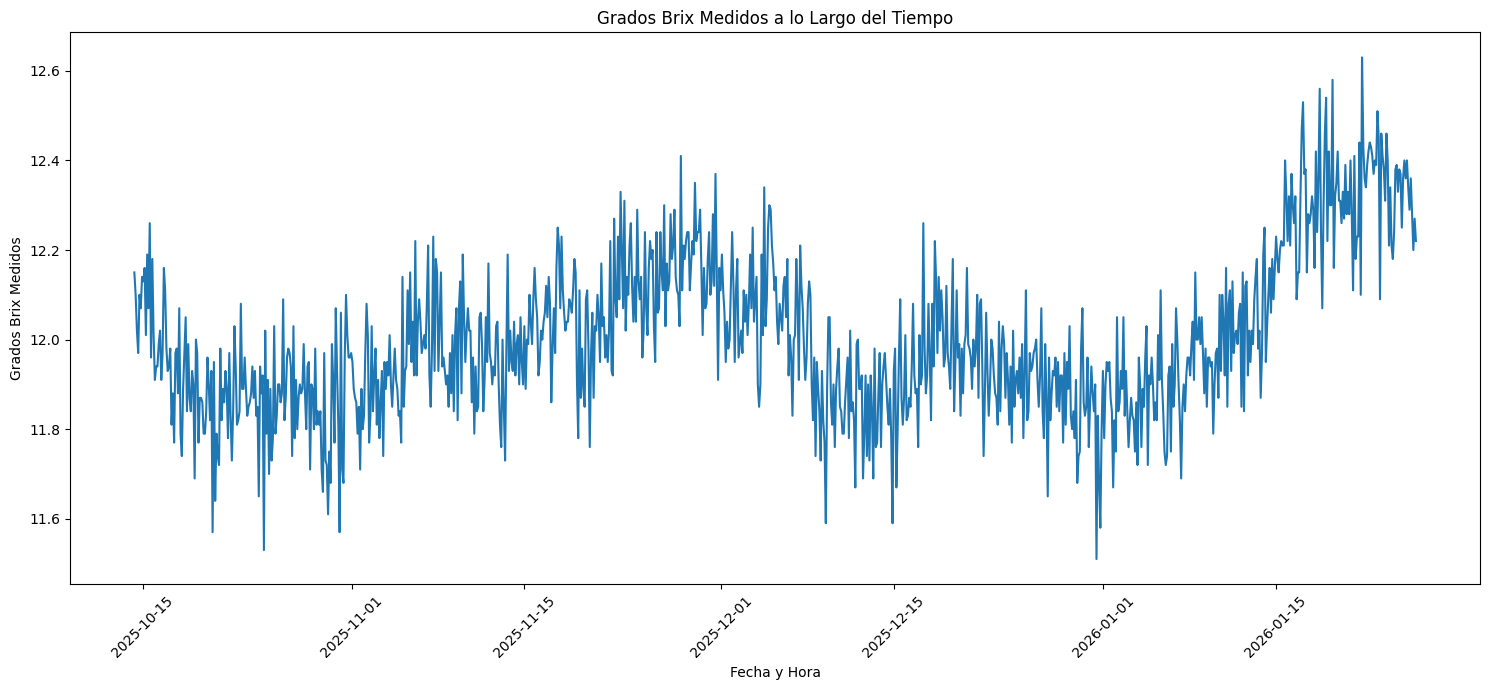

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Realizar la Prueba ADF
resultado_adf = adfuller(data['Brix_Medido'])

# Extraer los resultados
estadistico_adf = resultado_adf[0]
p_valor = resultado_adf[1]
valores_criticos = resultado_adf[4]

print(f'Estadístico ADF: {estadistico_adf}')
print(f'Valor p: {p_valor}')
print('Valores Críticos:')
for key, value in valores_criticos.items():
    print(f'   {key}: {value}')

# Interpretar los resultados
alpha = 0.05
print(f'\nNivel de Significación (α): {alpha} (5%)')

if p_valor <= alpha:
    print("Conclusión: Rechazamos la hipótesis nula (H0). La serie es estacionaria.")
else:
    print("Conclusión: No podemos rechazar la hipótesis nula (H0). La serie no es estacionaria.")

# También se puede comparar el estadístico ADF con los valores críticos
print("\nInterpretación adicional comparando el Estadístico ADF con los Valores Críticos:")
if estadistico_adf < valores_criticos['5%']:
    print(f"El Estadístico ADF ({estadistico_adf:.4f}) es menor que el valor crítico al 5% ({valores_criticos['5%']:.4f}), lo que sugiere que la serie es estacionaria.")
else:
    print(f"El Estadístico ADF ({estadistico_adf:.4f}) es mayor que el valor crítico al 5% ({valores_criticos['5%']:.4f}), lo que sugiere que la serie no es estacionaria (o se necesita más evidencia para rechazar H0).")

Estadístico ADF: -1.649466459124714
Valor p: 0.4573186970253822
Valores Críticos:
   1%: -3.4369927443074353
   5%: -2.864472756705845
   10%: -2.568331546097238

Nivel de Significación (α): 0.05 (5%)
Conclusión: No podemos rechazar la hipótesis nula (H0). La serie no es estacionaria.

Interpretación adicional comparando el Estadístico ADF con los Valores Críticos:
El Estadístico ADF (-1.6495) es mayor que el valor crítico al 5% (-2.8645), lo que sugiere que la serie no es estacionaria (o se necesita más evidencia para rechazar H0).


Al observar el gráfico de la serie temporal de "Grados Brix Medidos a lo Largo del Tiempo", se observa lo siguiente:

Tendencia: Parece haber una ligera tendencia al alza en los niveles de Brix a lo largo del período. Si bien existen fluctuaciones, el nivel general parece estar aumentando gradualmente. Esto coincide con el resultado anterior de la prueba ADF, que indica no estacionariedad.
Fluctuaciones: Se observan altibajos notables a lo largo de la serie. Estas fluctuaciones podrían deberse a diversos factores aún no analizados.
Sin estacionalidad clara: No se observa un patrón fuerte y repetitivo a intervalos fijos (como diarios o semanales) en este gráfico.
Conclusión del gráfico de la serie temporal:

El gráfico de la serie temporal confirma visualmente la no estacionariedad sugerida por la prueba ADF y revela una posible tendencia al alza en los niveles de Brix a lo largo del tiempo. Esta tendencia no se explica por los análisis de "Turno" o "Tipo_Naranja" que realizamos anteriormente.

Para investigar más a fondo la causa de esta tendencia y fluctuaciones, deberíamos explorar la relación entre "Brix_Medido" y "Temperatura_Proceso", como se sugirió anteriormente. También podríamos considerar si existen factores externos o cambios en el proceso ocurridos durante el período registrado por los datos que puedan explicar la tendencia observada.

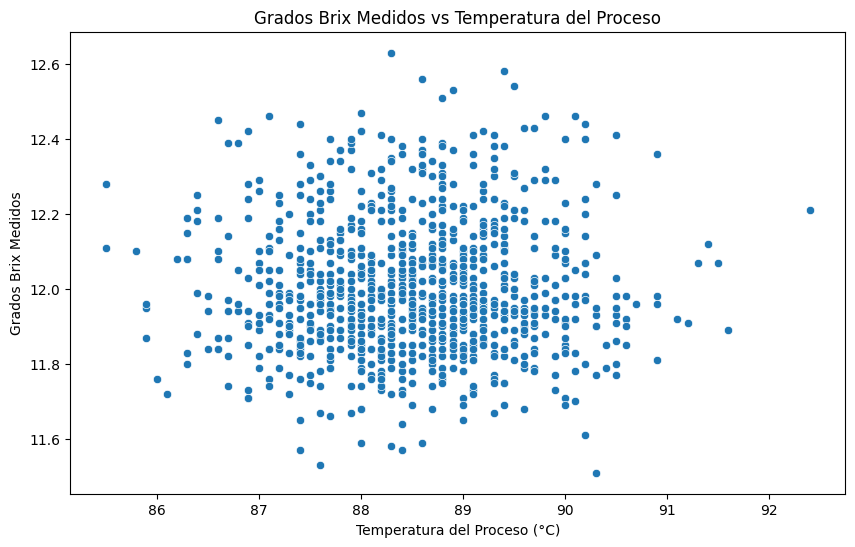


Coeficiente de correlación entre Brix Medido y Temperatura del Proceso: 0.0038


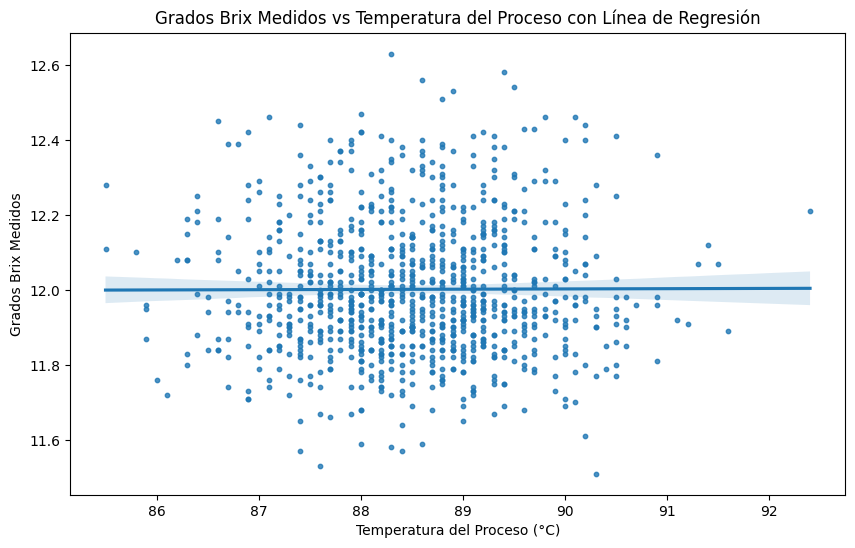

In [ ]:
#analiza la relacion de temperatura y grados brix

Basado en el diagrama de dispersión y el coeficiente de correlación entre los niveles de Brix y la temperatura del proceso:

Diagrama de dispersión: El diagrama de dispersión no muestra un patrón lineal claro entre las dos variables. Los puntos aparecen dispersos aleatoriamente, sin una tendencia evidente al alza o a la baja a medida que aumenta la temperatura del proceso.
Coeficiente de correlación: El coeficiente de correlación calculado es de aproximadamente 0,004. Un coeficiente de correlación cercano a cero indica una relación lineal muy débil o nula entre las dos variables.
Conclusión:

El análisis sugiere que no existe una relación lineal significativa entre los niveles de Brix medidos y la temperatura del proceso en este conjunto de datos. Esto significa que las variaciones en la temperatura del proceso, dentro del rango observado en estos datos, no parecen ser un factor importante que influya en los valores finales de Brix.

Esto refuerza la idea de que la no estacionariedad observada en la serie temporal de Brix probablemente se deba a otros factores aún no analizados. Para continuar la investigación, podríamos considerar:

#Otras variables:
¿Existen otros parámetros del proceso o características de la materia prima que no se incluyeron en este conjunto de datos y que podrían estar afectando los Brix? Factores externos: ¿Podrían influir las condiciones ambientales, los cambios en el abastecimiento de naranja o los programas de mantenimiento?
Relaciones no lineales: Aunque no existe una relación lineal, podría existir una relación no lineal más compleja que no se refleja en el coeficiente de correlación ni en un simple diagrama de dispersión.

In [ ]:
#next

# Tarea
Agregue una nueva columna llamada 'Acidez' al marco de datos 'data' con datos aleatorios entre 5,8 y 19,2 g/L, vuelva a ejecutar la prueba ADF en la columna 'Brix_Medido', analice la relación entre 'Acidez' y 'Brix_Medido' utilizando gráficos de dispersión y análisis de correlación, y resuma los hallazgos.

## Añadir la columna "Acidez"

### Subtarea:
Añadir una nueva columna llamada "Acidez" al DataFrame "datos" con datos aleatorios entre 5,8 y 19,2 g/L.


In [ ]:
# Generate random data for 'Acidez' between 5.8 and 19.2 g/L
acidez_data = np.random.uniform(low=5.8, high=19.2, size=len(data))

# Add the new column to the DataFrame
data['Acidez'] = acidez_data

# Display the first few rows of the updated DataFrame
display(data.head())

,ID_Lote,Fecha_Hora,Brix_Medido,Turno,Temperatura_Proceso,Tipo_Naranja,Acidez
0,1,2025-10-14 08:00:00,12.15,Mañana,87.8,Mixta,17.986355
1,2,2025-10-14 10:30:00,12.10,Tarde,88.4,Mixta,8.347725
2,3,2025-10-14 13:00:00,12.02,Noche,87.7,Valencia,16.804752
3,4,2025-10-14 15:30:00,11.97,Noche,88.2,Mixta,13.098054
4,5,2025-10-14 18:00:00,12.10,Mañana,86.6,Valencia,6.843277


## Volver a ejecutar la prueba ADF

### Subtarea:
Volver a ejecutar la prueba ADF en la columna 'Brix_Medido' con el DataFrame modificado..


In [ ]:
# Realizar la Prueba ADF nuevamente en la columna 'Brix_Medido'
resultado_adf = adfuller(data['Brix_Medido'])

# Extraer los resultados
estadistico_adf = resultado_adf[0]
p_valor = resultado_adf[1]
valores_criticos = resultado_adf[4]

print(f'Estadístico ADF: {estadistico_adf}')
print(f'Valor p: {p_valor}')
print('Valores Críticos:')
for key, value in valores_criticos.items():
    print(f'   {key}: {value}')

# Interpretar los resultados
alpha = 0.05
print(f'\nNivel de Significación (α): {alpha} (5%)')

if p_valor <= alpha:
    print("Conclusión: Rechazamos la hipótesis nula (H0). La serie es estacionaria.")
else:
    print("Conclusión: No podemos rechazar la hipótesis nula (H0). La serie no es estacionaria.")

# También se puede comparar el estadístico ADF con los valores críticos
print("\nInterpretación adicional comparando el Estadístico ADF con los Valores Críticos:")
if estadistico_adf < valores_criticos['5%']:
    print(f"El Estadístico ADF ({estadistico_adf:.4f}) es menor que el valor crítico al 5% ({valores_criticos['5%']:.4f}), lo que sugiere que la serie es estacionaria.")
else:
    print(f"El Estadístico ADF ({estadistico_adf:.4f}) es mayor que el valor crítico al 5% ({valores_criticos['5%']:.4f}), lo que sugiere que la serie no es estacionaria (o se necesita más evidencia para rechazar H0).")

Estadístico ADF: -1.649466459124714
Valor p: 0.4573186970253822
Valores Críticos:
   1%: -3.4369927443074353
   5%: -2.864472756705845
   10%: -2.568331546097238

Nivel de Significación (α): 0.05 (5%)
Conclusión: No podemos rechazar la hipótesis nula (H0). La serie no es estacionaria.

Interpretación adicional comparando el Estadístico ADF con los Valores Críticos:
El Estadístico ADF (-1.6495) es mayor que el valor crítico al 5% (-2.8645), lo que sugiere que la serie no es estacionaria (o se necesita más evidencia para rechazar H0).


## Analizar la relación entre acidez y brix medido

### Subtarea:
Analizar la relación entre la nueva columna "Acidez" y "Brix_Medido" mediante diagramas de dispersión y análisis de correlación.


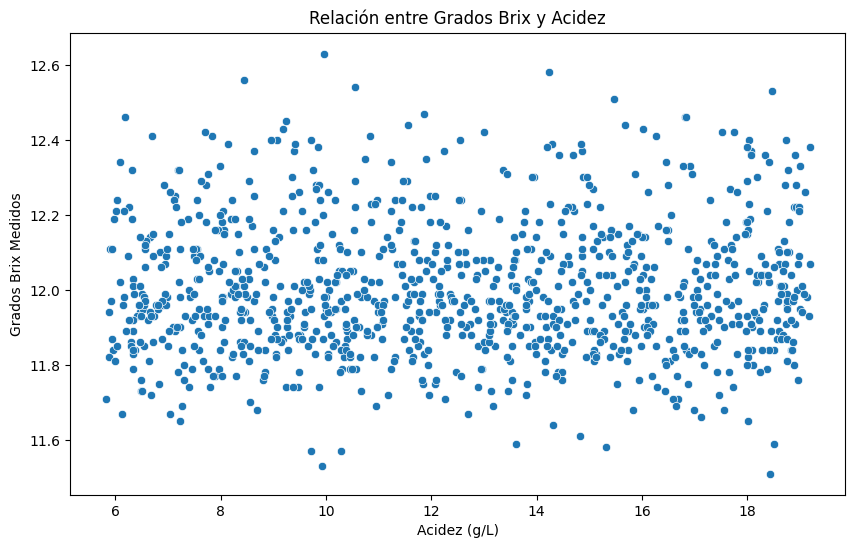

Coeficiente de correlación entre Brix Medido y Acidez: 0.0249


In [ ]:
# Create a scatter plot of 'Brix_Medido' versus 'Acidez'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Acidez', y='Brix_Medido', data=data)
plt.title('Relación entre Grados Brix y Acidez')
plt.xlabel('Acidez (g/L)')
plt.ylabel('Grados Brix Medidos')
plt.show()

# Calculate the Pearson correlation coefficient between 'Acidez' and 'Brix_Medido'
correlation = data['Acidez'].corr(data['Brix_Medido'])

# Print the correlation coefficient
print(f"Coeficiente de correlación entre Brix Medido y Acidez: {correlation:.4f}")

## Resumen de los hallazgos

### Subtarea:
Resumir los hallazgos de la prueba ADF y el análisis de la relación entre «Acidez» y «Brix_Medido».


## Resumen:

### Hallazgos Clave del Análisis de Datos

* La prueba Dickey-Fuller Aumentada (ADF) en la columna "Brix\_Medido" arrojó un estadístico ADF de -1,6495 y un valor p de 0,4573. Con un nivel de significancia de 0,05, no se pudo rechazar la hipótesis nula de no estacionariedad, lo que indica que la serie probablemente no sea estacionaria.
* El diagrama de dispersión y el análisis de correlación entre la columna "Acidez" recién añadida y "Brix\_Medido" revelaron una relación lineal positiva muy débil. El coeficiente de correlación de Pearson se calculó en aproximadamente 0,0249.

### Perspectivas o Próximos Pasos

* Investigar posibles transformaciones o técnicas de diferenciación para la serie "Brix\_Medido" si se requiere estacionariedad para un análisis posterior de series temporales. * Explorar las relaciones entre 'Brix\_Medido' y otras variables en el conjunto de datos para identificar predictores potenciales más fuertes o factores influyentes.


## Aplicar diferenciación a 'Brix_Medido'

### Subtarea:
Aplicar diferenciación de primer orden a la serie 'Brix_Medido'.

In [ ]:
# Apply first-order differencing
data['Brix_Medido_diff'] = data['Brix_Medido'].diff().dropna()

# Display the first few rows of the DataFrame with the new differenced column
print("DataFrame with differenced 'Brix_Medido':")
display(data.head())

DataFrame with differenced 'Brix_Medido':


,ID_Lote,Fecha_Hora,Brix_Medido,Turno,Temperatura_Proceso,Tipo_Naranja,Acidez,Brix_Medido_diff
0,1,2025-10-14 08:00:00,12.15,Mañana,87.8,Mixta,17.986355,NaN
1,2,2025-10-14 10:30:00,12.10,Tarde,88.4,Mixta,8.347725,-0.05
2,3,2025-10-14 13:00:00,12.02,Noche,87.7,Valencia,16.804752,-0.08
3,4,2025-10-14 15:30:00,11.97,Noche,88.2,Mixta,13.098054,-0.05
4,5,2025-10-14 18:00:00,12.10,Mañana,86.6,Valencia,6.843277,0.13


#Volver a ejecutar la prueba ADF en la serie diferenciada
##Subtarea:
Realizar la prueba ADF en la serie diferenciada 'Brix_Medido' para comprobar la estacionariedad.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Drop NaN values from the differenced series before performing the ADF test
differenced_series = data['Brix_Medido_diff'].dropna()

# Realizar la Prueba ADF en la serie diferenciada
resultado_adf_diff = adfuller(differenced_series)

# Extraer los resultados
estadistico_adf_diff = resultado_adf_diff[0]
p_valor_adf_diff = resultado_adf_diff[1]
valores_criticos_adf_diff = resultado_adf_diff[4]

print(f'Estadístico ADF (Diferenciado): {estadistico_adf_diff:.4f}')
print(f'Valor p (Diferenciado): {p_valor_adf_diff:.4f}')
print('Valores Críticos (Diferenciado):')
for key, value in valores_criticos_adf_diff.items():
    print(f'   {key}: {value:.4f}')

# Interpretar los resultados
alpha = 0.05
print(f'\nNivel de Significación (α): {alpha} (5%)')

if p_valor_adf_diff <= alpha:
    print("Conclusión: Rechazamos la hipótesis nula (H0). La serie diferenciada es estacionaria.")
else:
    print("Conclusión: No podemos rechazar la hipótesis nula (H0). La serie diferenciada no es estacionaria.")

# También se puede comparar el estadístico ADF con los valores críticos
print("\nInterpretación adicional comparando el Estadístico ADF con los Valores Críticos:")
if estadistico_adf_diff < valores_criticos_adf_diff['5%']:
    print(f"El Estadístico ADF Diferenciado ({estadistico_adf_diff:.4f}) es menor que el valor crítico al 5% ({valores_criticos_adf_diff['5%']:.4f}), lo que sugiere que la serie diferenciada es estacionaria.")
else:
    print(f"El Estadístico ADF Diferenciado ({estadistico_adf_diff:.4f}) es mayor que el valor crítico al 5% ({valores_criticos_diff['5%']:.4f}), lo que sugiere que la serie diferenciada no es estacionaria (o se necesita más evidencia para rechazar H0).")

Estadístico ADF (Diferenciado): -14.4145
Valor p (Diferenciado): 0.0000
Valores Críticos (Diferenciado):
   1%: -3.4370
   5%: -2.8645
   10%: -2.5683

Nivel de Significación (α): 0.05 (5%)
Conclusión: Rechazamos la hipótesis nula (H0). La serie diferenciada es estacionaria.

Interpretación adicional comparando el Estadístico ADF con los Valores Críticos:
El Estadístico ADF Diferenciado (-14.4145) es menor que el valor crítico al 5% (-2.8645), lo que sugiere que la serie diferenciada es estacionaria.


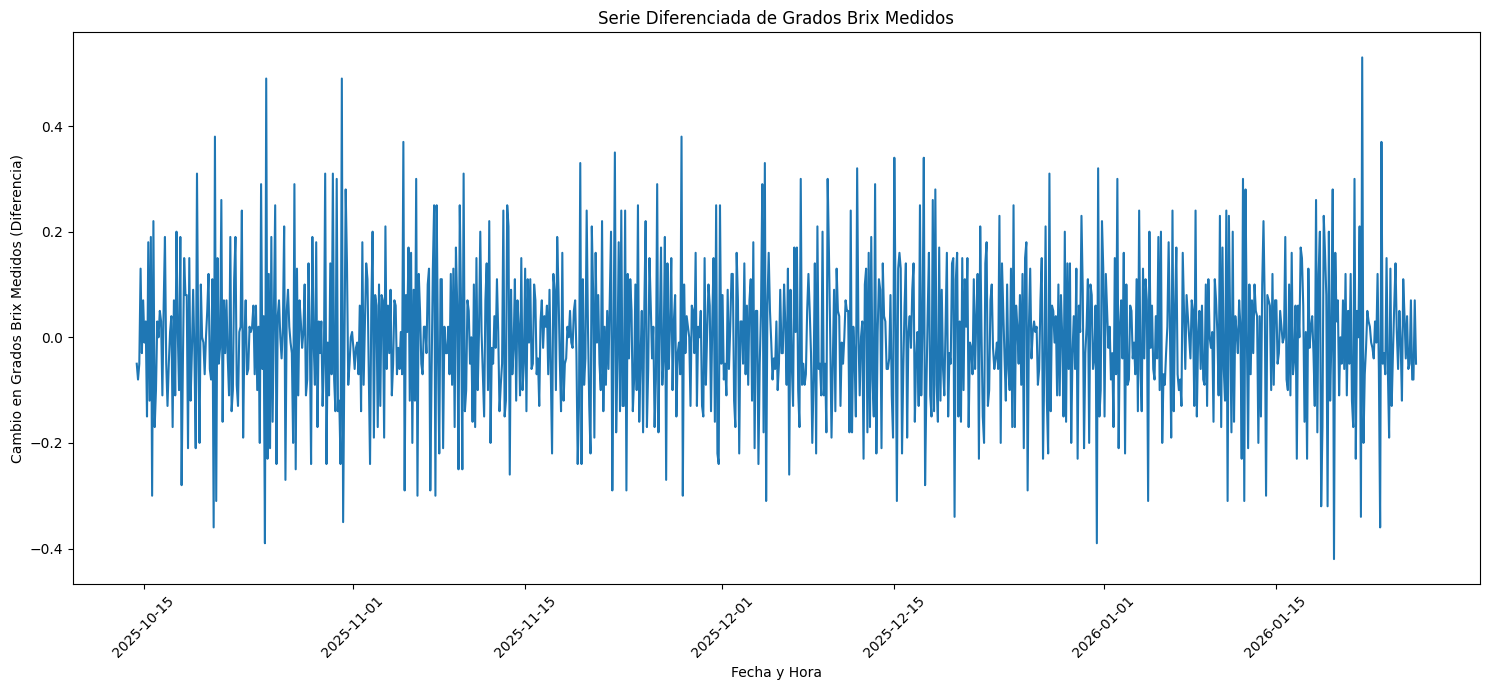

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the differenced series
plt.figure(figsize=(15, 7))
sns.lineplot(x=data['Fecha_Hora'].iloc[1:], y=data['Brix_Medido_diff'].dropna()) # Align dates with differenced data
plt.title('Serie Diferenciada de Grados Brix Medidos')
plt.xlabel('Fecha y Hora')
plt.ylabel('Cambio en Grados Brix Medidos (Diferencia)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#¿Qué debería hacer la planta ahora?

Contar con una serie estacionaria es un paso hacia un mejor análisis y control. La planta puede centrarse en lo siguiente:

Monitorear los "cambios": En lugar de solo observar el valor Brix, también monitoree cuánto cambia con respecto al lote anterior. Busque subidas o bajadas inusuales.
Investigar los "cambios": Cuando observe un cambio inusual en los valores Brix, intente relacionarlo con lo que ocurrió justo antes o durante ese lote. ¿Hubo un proveedor diferente? ¿Un ligero cambio en una etapa del procesamiento? ¿Procedía la materia prima de una nueva entrega?

Utilizar pronósticos (potencialmente): Con una serie estacionaria, podría construir un modelo de series temporales para pronosticar el cambio esperado en los valores Brix para el siguiente lote. Esto podría ser un sistema de alerta temprana si el cambio real está fuera del rango de pronóstico.

Recopilar más datos: El análisis mostró que "Turno", "Tipo_Naranja" y "Temperatura_Proceso" no explicaron la tendencia general. Los verdaderos responsables podrían ser esos factores externos. Empiece a recopilar datos sobre aspectos como el proveedor de naranjas, la fecha de cosecha o cualquier problema detectado con la calidad de la materia prima.
En resumen, concéntrese en comprender por qué el Brix varía de un lote a otro, en lugar de limitarse al valor absoluto del Brix. Identificar las causas de estos cambios es clave para mejorar la consistencia y mantener el Brix dentro del rango deseado (11,8 a 13,2).